In [1]:
# Packages
import os
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd
import rasterio
import xarray
import rioxarray
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import fiona
import mayavi.mlab as mlab # The 3D visualization package

In [2]:
# Go to path of ALOS PALSAR
path = "E:/documents/gis800_articles/jupyter/3D_dem"

In [3]:
# loading the temp.zip and creating a zip object
with ZipFile (os.path.join(path, 'AP_12103_FBD_F7180_RT1.zip'), 'r') as zObject:
    # Extracting all the members of the zip into a specific location.
    zObject.extractall(path=os.path.join(path, 'DEM'))
    

In [4]:
# Read the files in the extracted directory
print("These are the ALOS_PALSAR extracted files: ", os.listdir(os.path.join(path, 'DEM', 'AP_12103_FBD_F7180_RT1')))

These are the ALOS_PALSAR extracted files:  ['AP_12103_FBD_F7180_RT1.dem.tif', 'AP_12103_FBD_F7180_RT1.geo.jpg', 'AP_12103_FBD_F7180_RT1.geo.jpg.aux.xml', 'AP_12103_FBD_F7180_RT1.geo.wld', 'AP_12103_FBD_F7180_RT1.inc_map.tif', 'AP_12103_FBD_F7180_RT1.iso.xml', 'AP_12103_FBD_F7180_RT1.kmz', 'AP_12103_FBD_F7180_RT1.ls_map.tif', 'AP_12103_FBD_F7180_RT1_HH.tif', 'AP_12103_FBD_F7180_RT1_HV.tif']


In [5]:
# We will work with the file named: 'AP_12103_FBD_F7180_RT1.dem.tif'

In [6]:
# Load it into jupyter
dem = os.path.join(path, 'DEM', 'AP_12103_FBD_F7180_RT1', 'AP_12103_FBD_F7180_RT1.dem.tif')

In [7]:
# Open the file

#dem = rasterio.open(dem)

In [8]:
# The dreaded clipping exercise
import rasterio.mask

In [9]:
# Load the shapefile
# clippingShp = gpd.read_file(os.path.join(path, 'clipper.shp'))

In [10]:
# Open the shapefile and extract geometries
with fiona.open("E:/documents/gis800_articles/jupyter/3D_dem/clipper.shp", 'r') as shapefile:
    shapes = [feature['geometry'] for feature in shapefile] # A list comprehension for loop think of it as
    # for feature in shapefile:
       ##return feature['geometry']

In [11]:
# Open the raster and clip it using raster.mask
with rasterio.open(dem) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

In [12]:
# Update meta data for cropped raster
out_meta.update({'driver': "Gtiff",
                'height': out_image.shape[1],
                'width': out_image.shape[2],
                'transform': out_transform})

print(out_meta)

{'driver': 'Gtiff', 'dtype': 'int16', 'nodata': 0.0, 'width': 1884, 'height': 1480, 'count': 1, 'crs': CRS.from_epsg(32737), 'transform': Affine(12.5, 0.0, 302657.21875,
       0.0, -12.5, 9983459.25)}


In [13]:
# Path to new clipped raster
clippedRaster = os.path.join(path, 'DEM', 'clippedRaster.tif')

In [14]:
# Write the clipped raster to the new path defined by clippedRaster variable above
with rasterio.open(clippedRaster, 'w', **out_meta) as dest:
    dest.write(out_image) # The image to be written to the clippedRaster variable/path

In [15]:
# Open the clippedRaster file
demClipped = os.path.join(path, 'DEM', 'clippedRaster.tif')
demClipped = rasterio.open(demClipped)

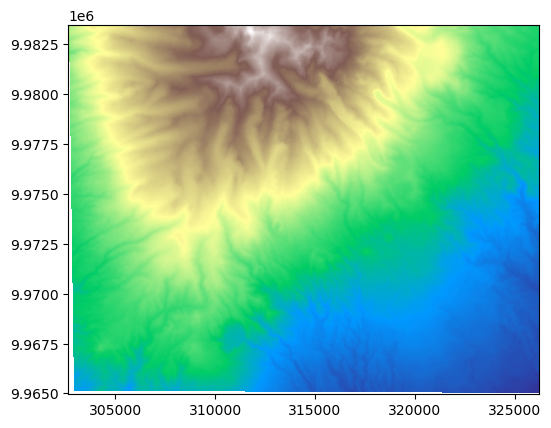

<AxesSubplot: >

In [16]:
# Display the clipped raster
from rasterio.plot import show
show(demClipped, cmap='terrain')

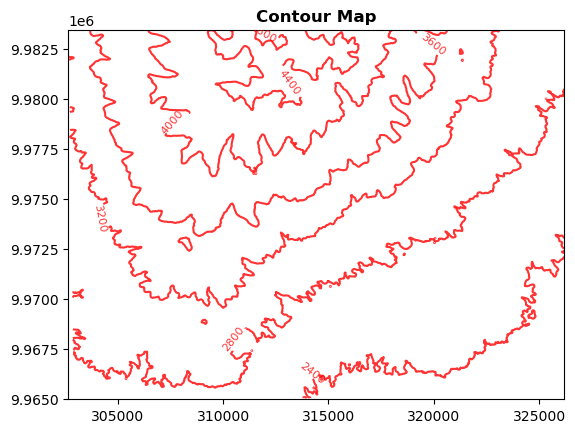

<AxesSubplot: title={'center': 'Contour Map'}>

In [17]:
# Display with contours only
show(demClipped, contour=True, title='Contour Map')

In [18]:
# Plot the raster in cartopy
demCartopy = rioxarray.open_rasterio(os.path.join(path, 'DEM', 'clippedRaster.tif'))

In [19]:
# Some info about the clipped raster
demCartopy

<xarray.DataArray (band: 1, y: 1480, x: 1884)>
[2788320 values with dtype=int16]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 3.027e+05 3.027e+05 ... 3.262e+05 3.262e+05
  * y            (y) float64 9.983e+06 9.983e+06 ... 9.965e+06 9.965e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     0
    scale_factor:   1.0
    add_offset:     0.0

In [20]:
# Add shapefile
bounding = gpd.read_file(os.path.join(path, 'clipper.shp'))

In [21]:
# Plot in cartopy
# fig = plt.figure(figsize=[8, 4])
# ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())
# dem_image = demCartopy.plot(ax=ax)
# bounding.plot(ax=ax, color='none', edgecolor='black', linewidth=0.4)
# plt.show()

In [22]:
# Title for 3D Visualization
mlab.figure('DEM of Mt Kenya Region')

In [23]:
# Open the raster to visualize
with rasterio.open(os.path.join(path, 'DEM', 'clippedRaster.tif')) as src:
    elev = src.read(1)

In [24]:
nrows, ncols = elev.shape

In [25]:
x, y = np.meshgrid(np.arange(ncols), np.arange(nrows))

In [26]:
z = elev

In [27]:
mesh = mlab.mesh(x, y, z)

In [28]:
mlab.show()

TypeError: invalid result from ImageEnumModel.rowCount(), 'float' object cannot be interpreted as an integer

TypeError: invalid result from ImageEnumModel.rowCount(), 'float' object cannot be interpreted as an integer

TypeError: invalid result from ImageEnumModel.rowCount(), 'float' object cannot be interpreted as an integer

TypeError: invalid result from ImageEnumModel.rowCount(), 'float' object cannot be interpreted as an integer

Exception occurred in traits notification handler for object: <mayavi.core.engine.Engine object at 0x000001FDE5833970>, trait: _current_selection, old value: <mayavi.core.scene.Scene object at 0x000001FDE5D5F060>, new value: <mayavi.core.module_manager.ModuleManager object at 0x000001FDE5FDA430>
Traceback (most recent call last):
  File "C:\Users\gachuhi\anaconda3\envs\python-gis\lib\site-packages\traits\trait_notifiers.py", line 524, in _dispatch_change_event
    self.dispatch(handler, *args)
  File "C:\Users\gachuhi\anaconda3\envs\python-gis\lib\site-packages\traits\trait_notifiers.py", line 619, in dispatch
    handler(*args)
  File "C:\Users\gachuhi\anaconda3\envs\python-gis\lib\site-packages\traitsui\editor.py", line 589, in _update_editor
    self.update_editor()
  File "C:\Users\gachuhi\anaconda3\envs\python-gis\lib\site-packages\traitsui\qt4\instance_editor.py", line 265, in update_editor
    self.resynch_editor()
  File "C:\Users\gachuhi\anaconda3\envs\python-gis\lib\site-pack

TypeError: invalid result from ImageEnumModel.rowCount(), 'float' object cannot be interpreted as an integer

TypeError: invalid result from ImageEnumModel.rowCount(), 'float' object cannot be interpreted as an integer

TypeError: invalid result from ImageEnumModel.rowCount(), 'float' object cannot be interpreted as an integer

TypeError: invalid result from ImageEnumModel.rowCount(), 'float' object cannot be interpreted as an integer

Exception occurred in traits notification handler for object: <mayavi.core.engine.Engine object at 0x000001FDE5833970>, trait: _current_selection, old value: <mayavi.modules.surface.Surface object at 0x000001FD800085E0>, new value: <mayavi.core.module_manager.ModuleManager object at 0x000001FDE5FDA430>
Traceback (most recent call last):
  File "C:\Users\gachuhi\anaconda3\envs\python-gis\lib\site-packages\traits\trait_notifiers.py", line 524, in _dispatch_change_event
    self.dispatch(handler, *args)
  File "C:\Users\gachuhi\anaconda3\envs\python-gis\lib\site-packages\traits\trait_notifiers.py", line 619, in dispatch
    handler(*args)
  File "C:\Users\gachuhi\anaconda3\envs\python-gis\lib\site-packages\traitsui\editor.py", line 589, in _update_editor
    self.update_editor()
  File "C:\Users\gachuhi\anaconda3\envs\python-gis\lib\site-packages\traitsui\qt4\instance_editor.py", line 265, in update_editor
    self.resynch_editor()
  File "C:\Users\gachuhi\anaconda3\envs\python-gis\lib\si